## 3.2 問題設定
常に確率が一定で、前回の結果が次回の結果に一切影響しないくじ引き  
5回くじを引いて「当たり、はずれ、はずれ、当たり、はずれ」だった  
1回のくじ引きで当たる確率をpとするとき、このpの値を求めよ

In [2]:
# ライブラリのimport
# NumPy用ライブラリ
import numpy as np
# Matplotlib中のpyplotライブラリのインポート
import matplotlib.pyplot as plt
# matplotlib日本語化対応ライブラリのインポート
import japanize_matplotlib
# pandas用ライブラリ
import pandas as pd
# データフレーム表示用関数
from IPython.display import display
# seaborn
import seaborn as sns

import pymc as pm
import arviz as az

# 表示オプション調整
# NumPy表示形式の設定
np.set_printoptions(precision=3, floatmode='fixed')
# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14
# サイズ設定
plt.rcParams['figure.figsize'] = (6, 6)
# 方眼表示ON
plt.rcParams['axes.grid'] = True
# データフレームでの表示精度
pd.options.display.float_format = '{:.3f}'.format
# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## 3.3 最尤推定による解法

## 5回のベルヌーイ試行結果と確率値
| 試行($k$)           | 1 | 2 | 3 | 4 | 5 |
|--------------------|---|---|---|---|---|
| 試行結果($X_k$)     | 1 | 0 | 0 | 1 | 0 |
| 確率値($P(X = X_k$) | p | 1-p | 1-p | p | 1-p |


試行XとYの結果が互いに影響を与えないとき、以下の式が成り立つ
$$
P(X \cap Y) = P(X)P(Y)
$$

5回の各試行は互いに影響を与えない  
当たり→はずれ→はずれ→当たり→はずれは以下の式となる  
$
=P(X_1=1 \cap X_2=0 \cap X_3=0 \cap X_4=1 \cap X_5=0)\\
=P(X_1=1)*P(X_2=0)*P(X_3=0)*P(X_4=1)*P(X_5=0)\\
=p*(1-p)*(1-p)*p*(1-p) = p^2(1-p)^3
$

これを確率値pの関数とみると
$
f(p) = p^2(1-p)^3
$

この関数を尤度関数と呼ぶ

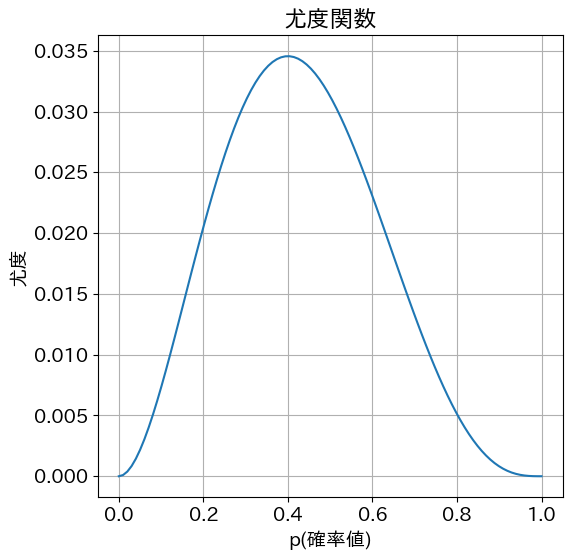

In [3]:
import numpy as np

import matplotlib.pyplot as plt

# 尤度関数の定義
def likelihood(p):
    return p**2 * (1-p)**3

# pの範囲を設定
p_values = np.linspace(0, 1, 100)

# 尤度関数の値を計算
likelihood_values = likelihood(p_values)

# プロット
plt.plot(p_values, likelihood_values)
plt.xlabel('p(確率値)')
plt.ylabel('尤度')
plt.title('尤度関数')
plt.grid(True)
plt.show()